<a href="https://colab.research.google.com/github/MarkAvilin1/DS-and-ML/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Альтра Pro

In [1]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Adadelta 
from tensorflow.keras import utils 
from tensorflow.keras.preprocessing import image 
from google.colab import files 
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image 
import random 
import math 
import os 
from google.colab import drive

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip -q '/content/drive/MyDrive/University AI/datasets/middle_fmr.zip' -d /content/cars 

In [4]:
train_path = '/content/cars'
batch_size = 10
img_width = 288
img_height = 162 

In [5]:
datagen = ImageDataGenerator(
    rescale=1. / 255, 
    rotation_range=10, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    zoom_range=0.1, 
    horizontal_flip=True, 
    fill_mode='nearest',
    validation_split=0.2 
)

In [6]:
train_generator = datagen.flow_from_directory(
    train_path, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='categorical',  
    shuffle=True, 
    subset='training' 
)

validation_generator = datagen.flow_from_directory(
    train_path, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='categorical', 
    shuffle=True,
    subset='validation'
)

Found 2743 images belonging to 3 classes.
Found 684 images belonging to 3 classes.


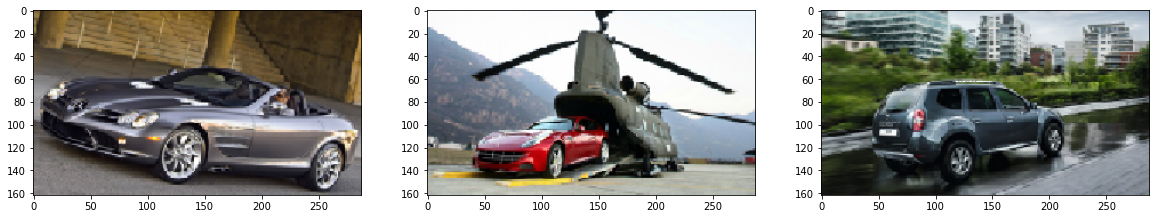

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(20, 4)) 
for i in range(3):                             
  car_path = f'{train_path}/{os.listdir(train_path)[i]}/' 
  img_path = car_path + random.choice(os.listdir(car_path))     
  axs[i].imshow(image.load_img(img_path, target_size=(img_height, img_width))) 

plt.show()

In [8]:
model = Sequential()

model.add(Conv2D(128, (2, 2), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
model.add(Conv2D(128, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(2048, activation='elu'))
model.add(Dense(4096, activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [9]:
model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=40,
    verbose=1,
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/40
274/274 [==============================] - 170s 557ms/step - loss: 1.0663 - accuracy: 0.4760 - val_loss: 1.0531 - val_accuracy: 0.4632
Epoch 2/40
274/274 [==============================] - 149s 545ms/step - loss: 0.9070 - accuracy: 0.5638 - val_loss: 0.9871 - val_accuracy: 0.5574
Epoch 3/40
274/274 [==============================] - 149s 544ms/step - loss: 0.8422 - accuracy: 0.6140 - val_loss: 0.9082 - val_accuracy: 0.5779
Epoch 4/40
274/274 [==============================] - 149s 542ms/step - loss: 0.8245 - accuracy: 0.6257 - val_loss: 0.8790 - val_accuracy: 0.5574
Epoch 5/40
274/274 [==============================] - 149s 542ms/step - loss: 0.8108 - accuracy: 0.6257 - val_loss: 0.9310 - val_accuracy: 0.5544
Epoch 6/40
274/274 [==============================] - 149s 543ms/step - loss: 0.7877 - accuracy: 0.6378 - val_loss: 0.8988 - val_accuracy: 0.5588
Epoch 7/40
274/274 [==============================] - 149s 542ms/step - loss: 0.7570 - accuracy: 0.6623 - val_loss: 0.8327 -